/home/debian/usask_work/SSRT/.venv/lib/python3.11/site-packages/aiem/core.py:415: RuntimeWarning: overflow encountered in power
  kscs2n = kscs2 ** fn
/home/debian/usask_work/SSRT/.venv/lib/python3.11/site-packages/aiem/core.py:417: RuntimeWarning: invalid value encountered in multiply
  term_common = temp1 * kscs2n * self.spectra_1


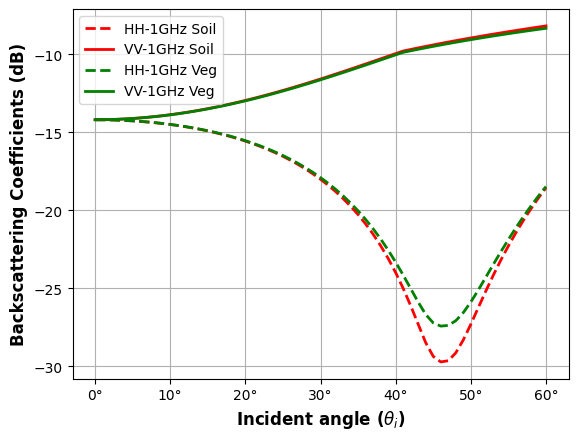

In [ ]:
import numpy as np
from collections import defaultdict
from ssrt import S2RTR
import matplotlib.pyplot as plt


# Set the bacscattering models
RT_models = {
    'RT_s': 'AIEM', # options: 'AIEM', 'PRISM1'
    'RT_c': 'Diff' # options: 'Diffuse', 'Specular'
    }

# Radar parameters
frqs = [1, 3, 5]
thetas = np.arange(0.00001, 61, 1)
phi_i = 0.
phi_s = 179.999

# Vegetation parameters
eps2 = 2+0.*1j # Canopy
a = 0.01
kappa_e = 0.1
d = 0.1

# Soil parameters
eps3 = 5+2.*1j # Soil
s = 0.05
cl = 0.1
acftype = '2'

# Initialize defaultdicts to store the results
HH_s = defaultdict(list)
VV_s = defaultdict(list)
HV_s = defaultdict(list)
VH_s = defaultdict(list)

HH_t = defaultdict(list)
VV_t = defaultdict(list)
HV_t = defaultdict(list)
VH_t = defaultdict(list)

# Loop over the angles
for f in frqs:
    for theta_i in thetas:
        theta_s = theta_i

        # Create an instance of the S2RTR class
        rt = S2RTR(f=f, theta_i=theta_i, theta_s=theta_s, phi_i=phi_i, phi_s=phi_s,
                   s=s, a=a, kappa_e=kappa_e, d=d, cl=cl, acftype=acftype,
                   eps2=eps2, eps3=eps3, RT_models=RT_models)
        # Calculate backscattering coefficients
        sig_a, sig_s, sig_t = rt.calc_sigma(todB=True, get_sig_ground=True)
        # print(f, theta_i, sig_s, sig_t)
        # Store the results in the defaultdicts
        HH_s[f].append(sig_s['hh'])
        VV_s[f].append(sig_s['vv'])
        HV_s[f].append(sig_s['hv'])
        VH_s[f].append(sig_s['vh'])

        HH_t[f].append(sig_t['hh'])
        VV_t[f].append(sig_t['vv'])
        HV_t[f].append(sig_t['hv'])
        VH_t[f].append(sig_t['vh'])


# Plotting results
plt.figure(2)
# Plotting HH and VV for each itype
plt.plot(thetas, HH_s[1], color='r', linewidth=2, label='HH-1GHz Soil', linestyle='--')
plt.plot(thetas, VV_s[1], color='r', linewidth=2, label='VV-1GHz Soil')

# plt.plot(thetas, HH_s[3], color='b', linewidth=2, label='HH-3GHz Soil', linestyle='--')
# plt.plot(thetas, VV_s[3], color='b', linewidth=2, label='VV-3GHz Soil')

plt.plot(thetas, HH_t[1], color='g', linewidth=2, label='HH-1GHz Veg', linestyle='--')
plt.plot(thetas, VV_t[1], color='g', linewidth=2, label='VV-1GHz Veg')

# plt.plot(thetas, HH_t[3], color='c', linewidth=2, label='HH-3GHz Veg', linestyle='--')
# plt.plot(thetas, VV_t[3], color='c', linewidth=2, label='VV-3GHz Veg')

# plt.plot(thetas, HH_soil[3], color='b', linewidth=2, label='HH-3GHz Soil', linestyle='--')
# plt.plot(thetas, VV_soil[3], color='c', linewidth=2, label='VV-3GHz Soil')
# plt.plot(thetas, HH_soil[5], color='m', linewidth=2, label='HH-5GHz Soil', linestyle='--')
# plt.plot(thetas, VV_soil[5], color='y', linewidth=2, label='VV-5GHz Soil')
# Customizing plot appearance
plt.grid(True)
plt.xticks(ticks=np.arange(0, 61, 10), labels=['0°', '10°', '20°', '30°', '40°', '50°', '60°'])
plt.xlabel(r'Incident angle ($\theta_i$)', fontsize=12, fontweight='bold')
plt.ylabel('Backscattering Coefficients (dB)', fontsize=12, fontweight='bold')
plt.legend(fontsize=10)
plt.show()